In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')



In [23]:
ott = pd.read_csv('P4-Section6-Homework-Dataset.csv', encoding='unicode_escape')

In [24]:
ott.head()

,Day of Week,Director,Genre,Movie Title,Release Date,Studio,Adjusted Gross ($mill),Budget ($mill),Gross ($mill),IMDb Rating,MovieLens Rating,Overseas ($mill),Overseas%,Profit ($mill),Profit%,Runtime (min),US ($mill),Gross % US
0,Friday,Brad Bird,action,Tomorrowland,22-05-2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14-03-2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
2,Friday,Patrick Hughes,action,The Expendables 3,15-08-2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16-03-2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,28-06-2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6


In [25]:
ott.shape

(608, 18)

In [26]:
ott.columns

Index(['Day of Week', 'Director', 'Genre', 'Movie Title', 'Release Date',
       'Studio', 'Adjusted Gross ($mill)', 'Budget ($mill)', 'Gross ($mill)',
       'IMDb Rating', 'MovieLens Rating', 'Overseas ($mill)', 'Overseas%',
       'Profit ($mill)', 'Profit%', 'Runtime (min)', 'US ($mill)',
       'Gross % US'],
      dtype='object')

In [27]:
ott.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Day of Week             608 non-null    object 
 1   Director                608 non-null    object 
 2   Genre                   608 non-null    object 
 3   Movie Title             608 non-null    object 
 4   Release Date            608 non-null    object 
 5   Studio                  608 non-null    object 
 6   Adjusted Gross ($mill)  608 non-null    object 
 7   Budget ($mill)          608 non-null    float64
 8   Gross ($mill)           608 non-null    object 
 9   IMDb Rating             608 non-null    float64
 10  MovieLens Rating        608 non-null    float64
 11  Overseas ($mill)        608 non-null    object 
 12  Overseas%               608 non-null    float64
 13  Profit ($mill)          608 non-null    object 
 14  Profit%                 608 non-null    fl

In [28]:
ott.describe()

,Budget ($mill),IMDb Rating,MovieLens Rating,Overseas%,Profit%,Runtime (min),US ($mill),Gross % US
count,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000
mean,92.467928,6.923849,3.340378,57.698849,719.278783,117.781250,167.135197,42.301151
std,59.421407,0.925890,0.454071,12.334237,1942.807248,23.179122,92.465903,12.334237
min,0.600000,3.600000,1.490000,17.200000,7.700000,30.000000,0.000000,0.000000
25%,45.000000,6.375000,3.037500,49.900000,201.850000,100.000000,106.950000,33.700000
50%,80.000000,6.900000,3.365000,58.200000,338.550000,116.000000,141.700000,41.800000
75%,130.000000,7.600000,3.672500,66.300000,650.100000,130.250000,202.100000,50.100000
max,300.000000,9.200000,4.500000,100.000000,41333.300000,238.000000,760.500000,82.800000


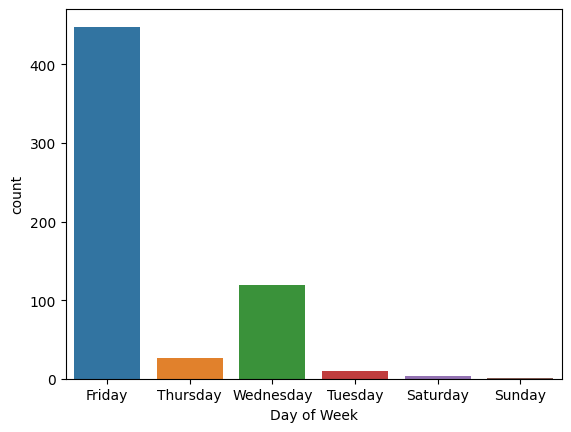

In [33]:
vis1 = sns.countplot(data=ott, x='Day of Week')

In [34]:
ott.Studio.unique()

array(['Buena Vista Studios', 'Lionsgate', 'Sony', 'Universal',
       'Paramount Pictures', 'WB', 'Weinstein Company',
       'UA Entertainment', 'WB/New Line', 'New Line Cinema', 'Fox',
       'TriStar', 'Relativity Media', 'Screen Gems', 'StudioCanal',
       'Fox Searchlight Pictures', 'MiraMax', 'Path_ Distribution',
       'DreamWorks', 'Lionsgate Films', 'Revolution Studios',
       'Dimension Films', 'USA', 'Lionsgate/Summit',
       'Sony Picture Classics', 'Pacific Data/DreamWorks', 'Disney',
       'Art House Studios', 'Colombia Pictures', 'Gramercy Pictures',
       'Summit Entertainment', 'Vestron Pictures', 'MGM', 'Orion', 'IFC',
       'New Market Films'], dtype=object)

In [35]:
len(ott.Studio.unique())

36

In [36]:
ott.Genre.unique()

array(['action', 'comedy', 'adventure', 'horror', 'animation',
       'biography', 'drama', 'musical', 'sci-fi', 'crime', 'romance',
       'fantasy', 'mystery', 'thriller', 'documentary'], dtype=object)

**No. of Genres by their types**

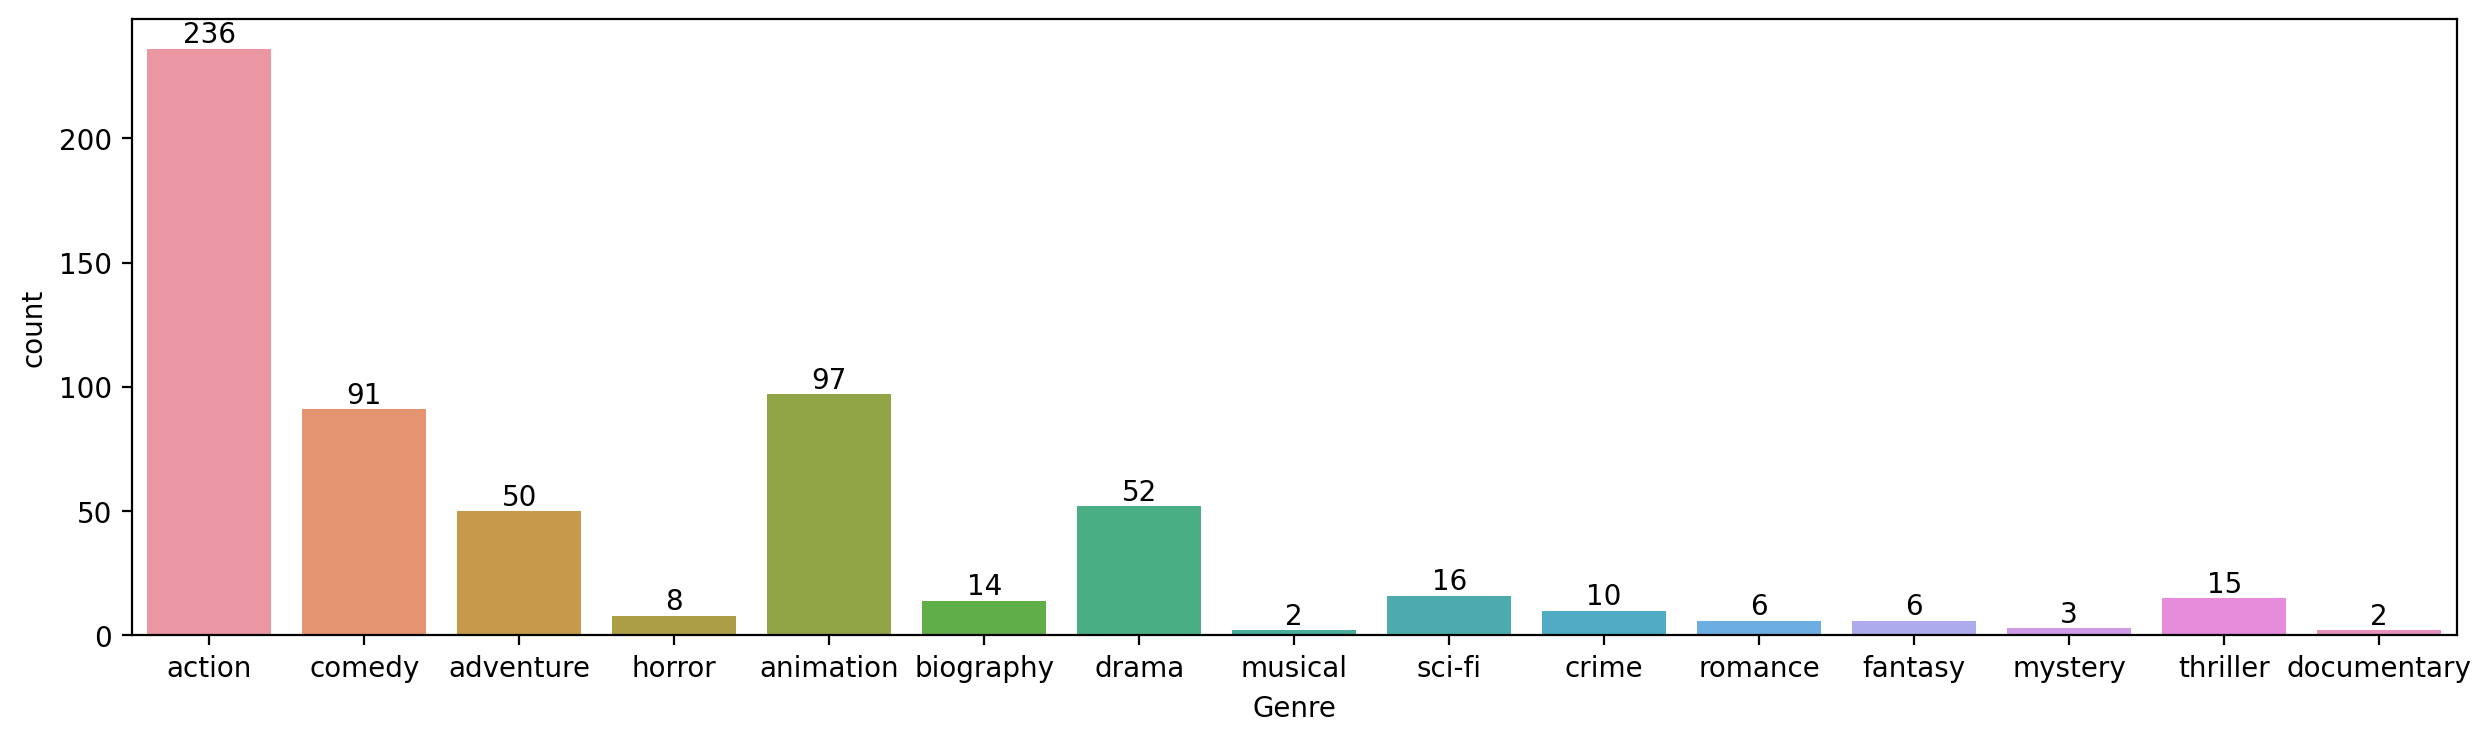

In [39]:
plt.figure(figsize=(15,4), dpi=200)
vis2 = sns.countplot(data=ott, x='Genre')
for bars in vis2.containers:
    vis2.bar_label(bars)
    

**Director and Genre according to Revenue**

In [43]:
info1 = ott.groupby(['Director','Genre'], as_index=False) ['US ($mill)'].sum().sort_values(by='US ($mill)', ascending=False)

In [44]:
info1

,Director,Genre,US ($mill)
266,Michael Bay,action,1991.9
401,Steven Spielberg,action,1622.3
76,Christopher Nolan,action,1482.5
147,Gore Verbinski,action,1127.4
375,Sam Raimi,action,1113.8
...,...,...,...
292,Patrick Hughes,action,39.3
393,Steve Bendelack,comedy,33.3
156,Hayao Miyazaki,animation,29.9
290,"Olivier Nakache, Eric Toledano",drama,10.2


In [45]:
info1new = info1.nlargest(10,'US ($mill)')

In [47]:
info1new

,Director,Genre,US ($mill)
266,Michael Bay,action,1991.9
401,Steven Spielberg,action,1622.3
76,Christopher Nolan,action,1482.5
147,Gore Verbinski,action,1127.4
375,Sam Raimi,action,1113.8
218,Joss Whedon,action,1075.9
402,Steven Spielberg,adventure,1035.9
313,Peter Jackson,adventure,1034.6
52,Bryan Singer,action,952.6
106,David Yates,adventure,890.0


**Which director earned more revenue?**

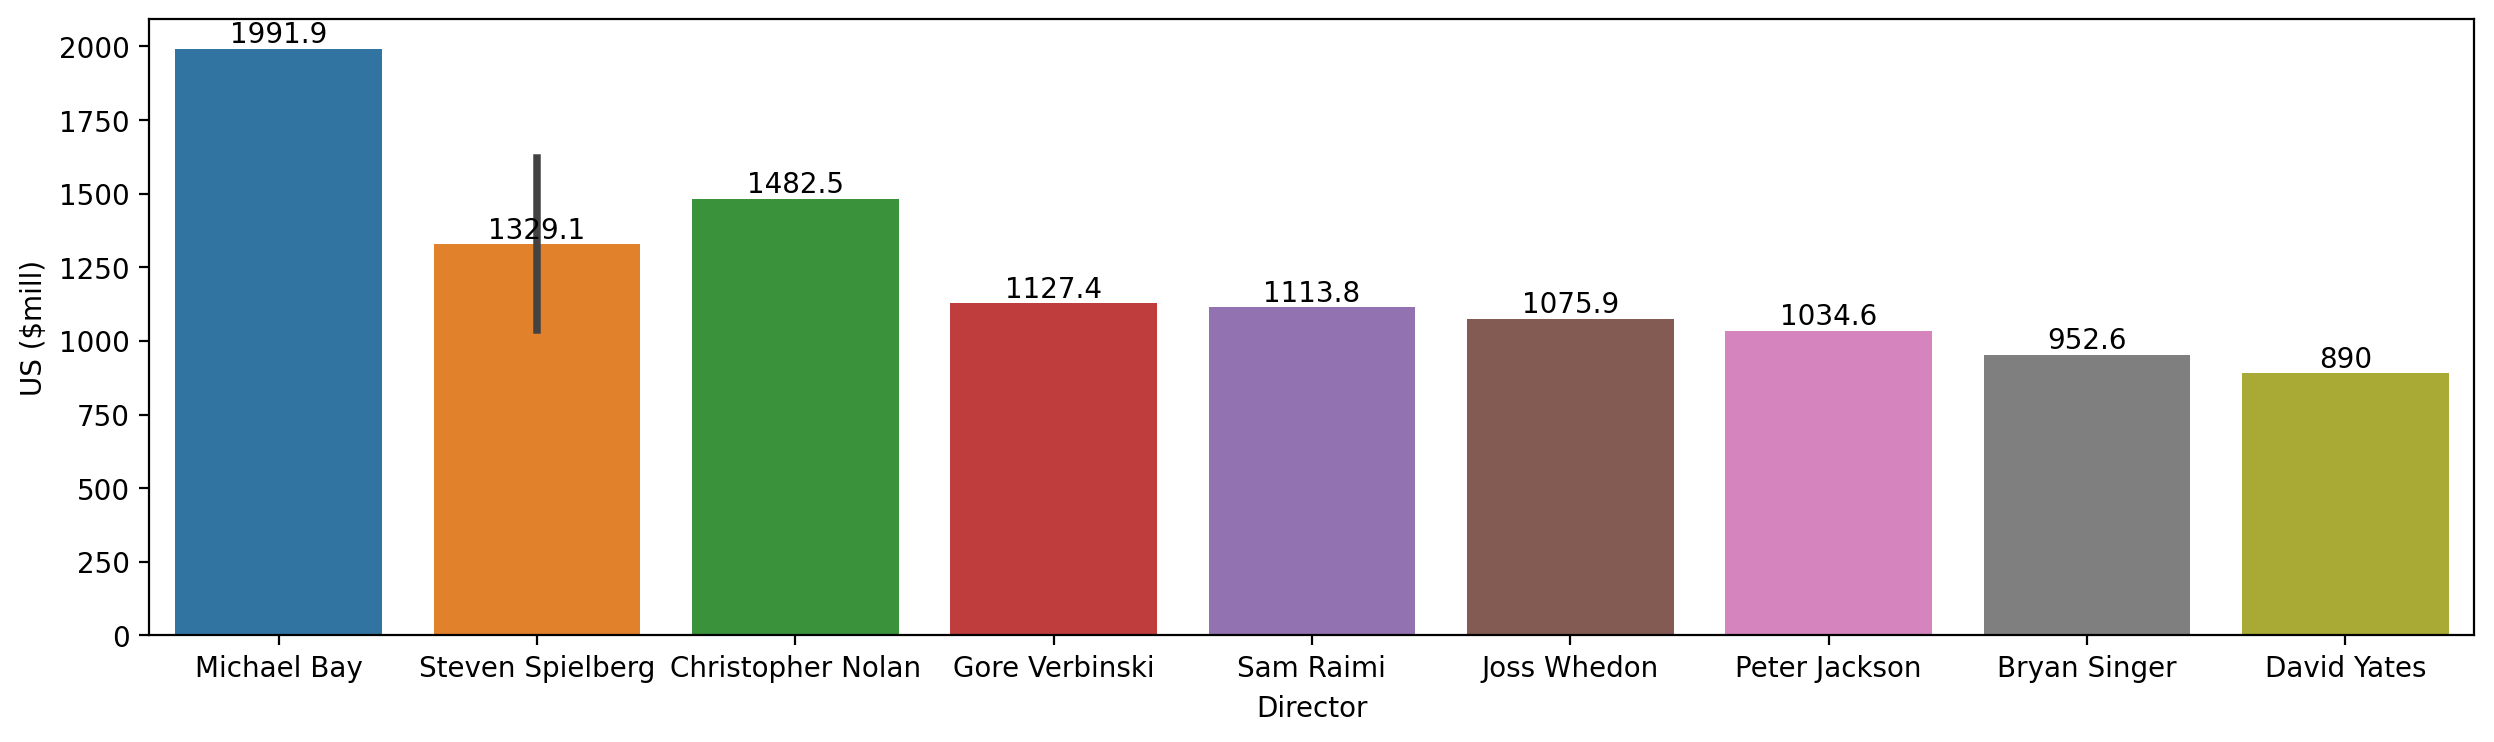

In [115]:
plt.figure(figsize=(15,4), dpi=200)
vis3 = sns.barplot(data=info1new, x='Director', y='US ($mill)')
for bars in vis3.containers:
    vis3.bar_label(bars)

**Genre with high revenue**

In [111]:
we = ott['Genre'].unique()

In [112]:
we

array(['action', 'comedy', 'adventure', 'horror', 'animation',
       'biography', 'drama', 'musical', 'sci-fi', 'crime', 'romance',
       'fantasy', 'mystery', 'thriller', 'documentary'], dtype=object)

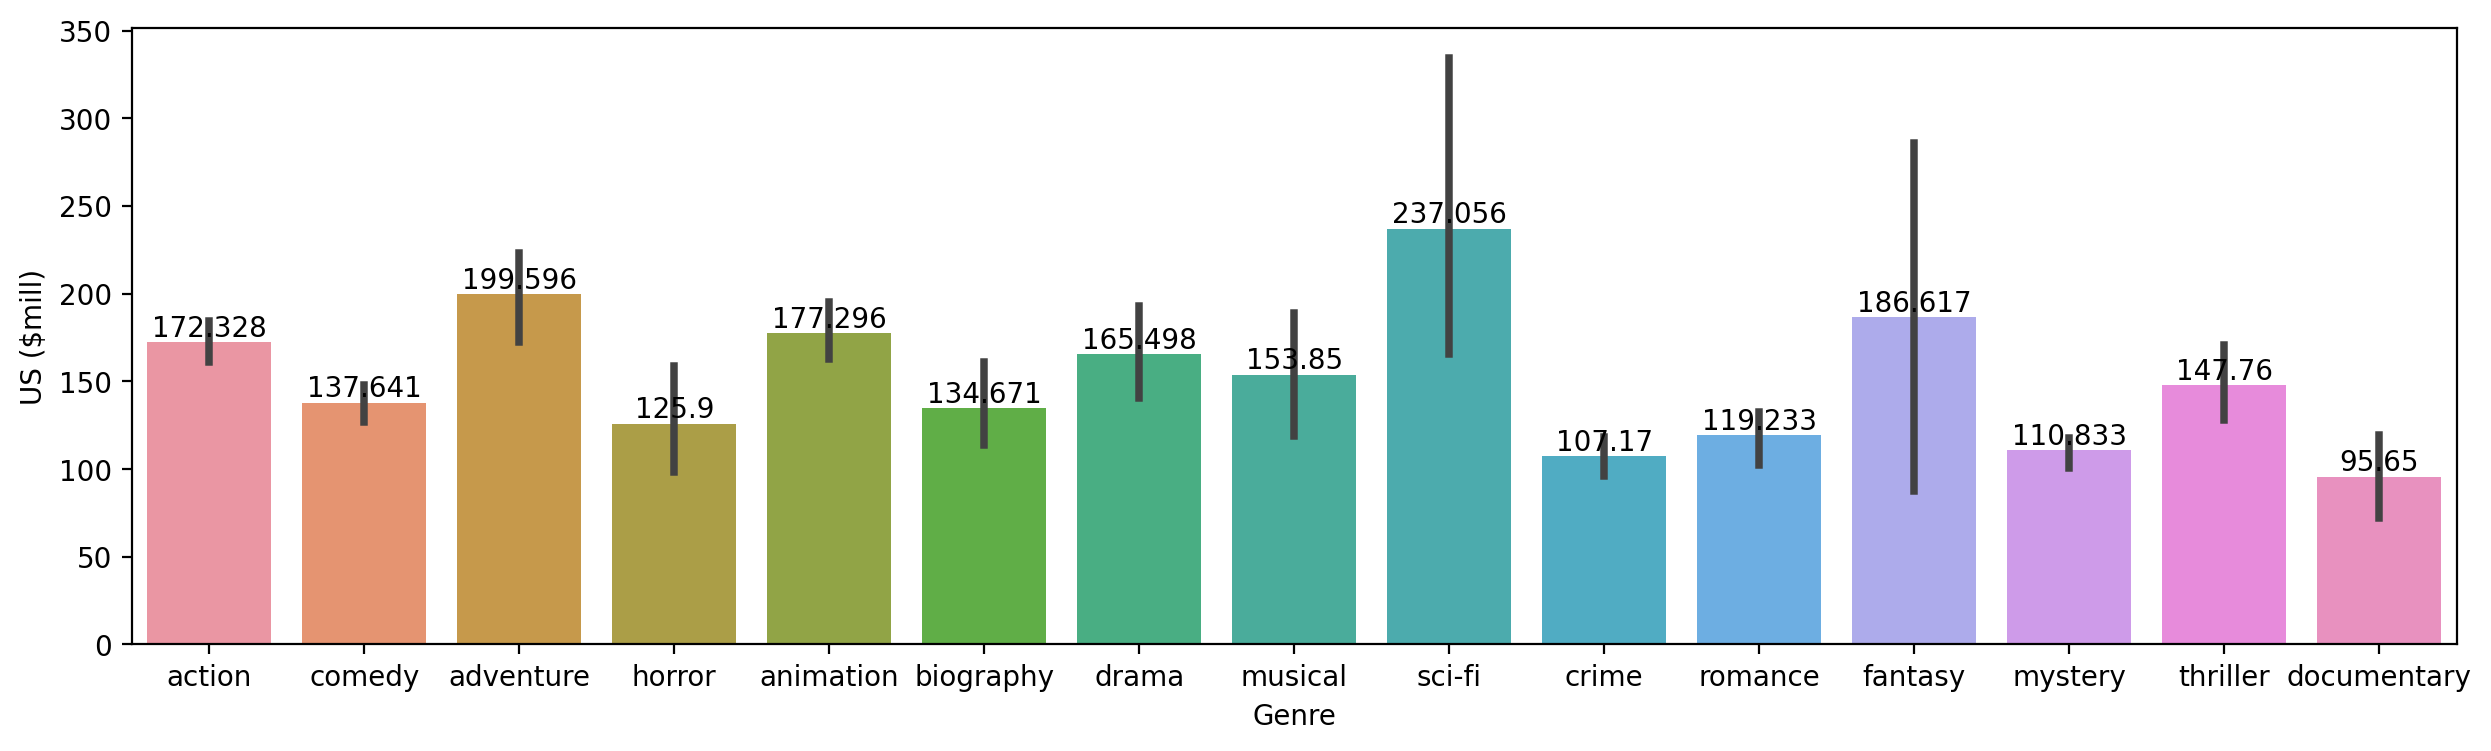

In [113]:
plt.figure(figsize=(15,4), dpi=200)
vis4 = sns.barplot(data=ott, x='Genre', y='US ($mill)')
for bars in vis4.containers:
    vis4.bar_label(bars)

In [52]:
ott.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Day of Week             608 non-null    object 
 1   Director                608 non-null    object 
 2   Genre                   608 non-null    object 
 3   Movie Title             608 non-null    object 
 4   Release Date            608 non-null    object 
 5   Studio                  608 non-null    object 
 6   Adjusted Gross ($mill)  608 non-null    object 
 7   Budget ($mill)          608 non-null    float64
 8   Gross ($mill)           608 non-null    object 
 9   IMDb Rating             608 non-null    float64
 10  MovieLens Rating        608 non-null    float64
 11  Overseas ($mill)        608 non-null    object 
 12  Overseas%               608 non-null    float64
 13  Profit ($mill)          608 non-null    object 
 14  Profit%                 608 non-null    fl

**Top 5 movies with highest budget**

In [66]:
info2 = ott.groupby(['Movie Title'], as_index=False) ['Budget ($mill)'].sum().sort_values(by='Budget ($mill)', ascending=False)

In [67]:
info2

,Movie Title,Budget ($mill)
336,Pirates of the Caribbean: At World's End,300.0
454,The Dark Knight Rises,275.0
241,John Carter,263.7
426,Tangled,260.0
411,Spider-Man 3,258.0
...,...,...
156,Four Weddings and a Funeral,4.5
176,Gone with the Wind,3.9
380,Saturday Night Fever,3.5
472,The Full Monty,3.5


In [77]:
info2new = info2.nlargest(5,'Budget ($mill)')

In [78]:
info2new

,Movie Title,Budget ($mill)
336,Pirates of the Caribbean: At World's End,300.0
454,The Dark Knight Rises,275.0
241,John Carter,263.7
426,Tangled,260.0
411,Spider-Man 3,258.0


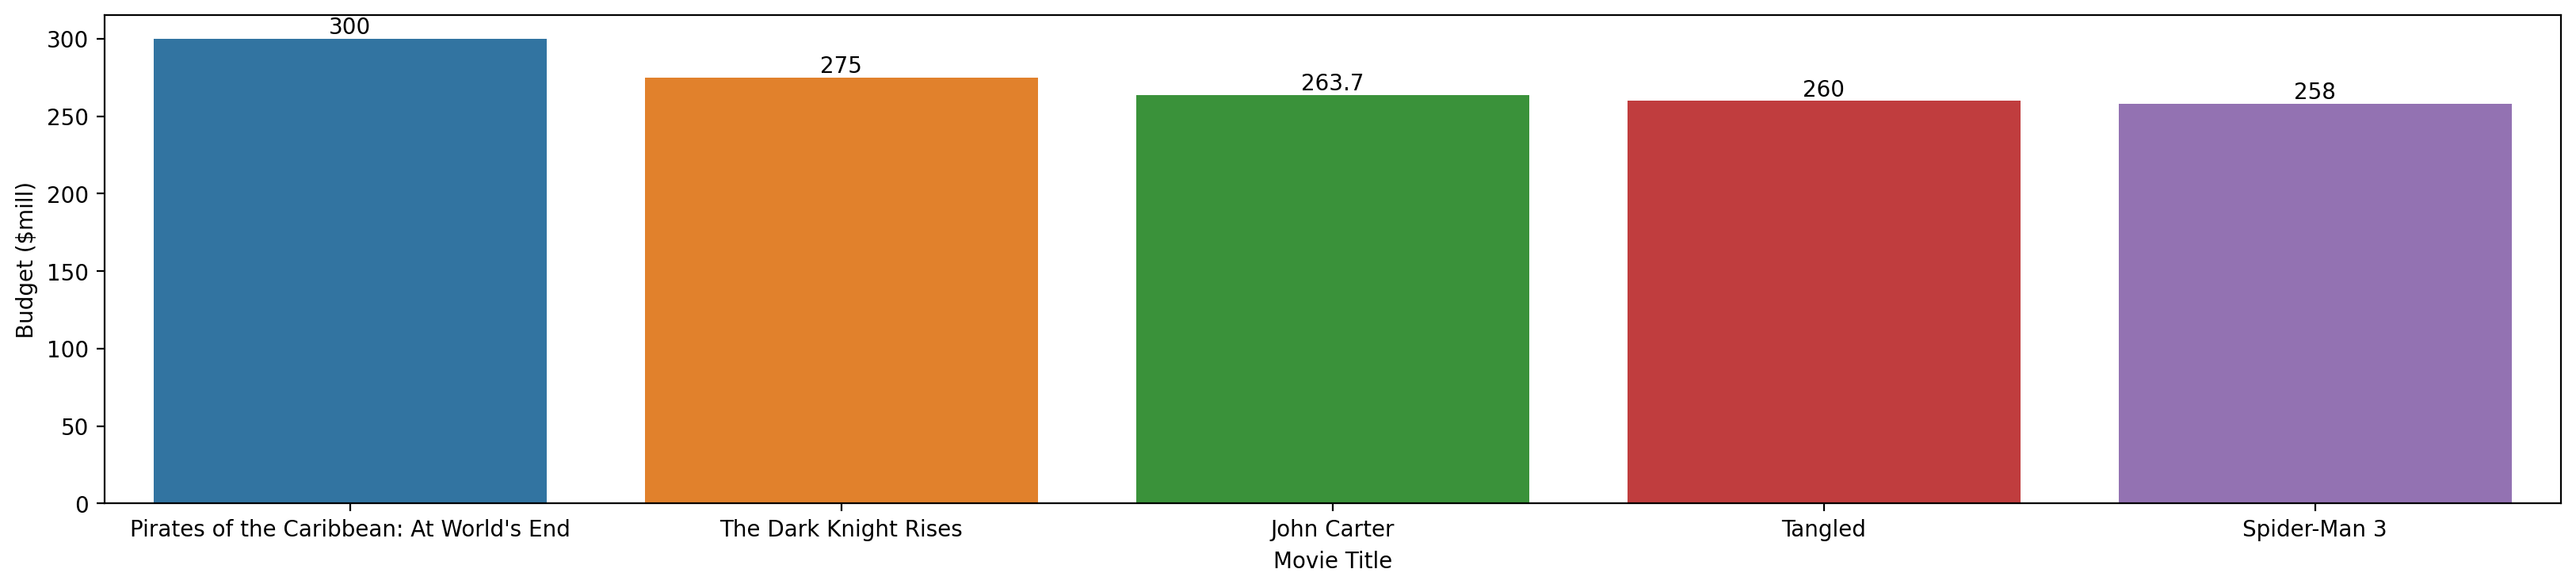

In [79]:
plt.figure(figsize=(20,4), dpi=200)
vis4 = sns.barplot(data=info2new, x='Movie Title', y='Budget ($mill)')
for bars in vis4.containers:
    vis4.bar_label(bars)

In [80]:
ott.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Day of Week             608 non-null    object 
 1   Director                608 non-null    object 
 2   Genre                   608 non-null    object 
 3   Movie Title             608 non-null    object 
 4   Release Date            608 non-null    object 
 5   Studio                  608 non-null    object 
 6   Adjusted Gross ($mill)  608 non-null    object 
 7   Budget ($mill)          608 non-null    float64
 8   Gross ($mill)           608 non-null    object 
 9   IMDb Rating             608 non-null    float64
 10  MovieLens Rating        608 non-null    float64
 11  Overseas ($mill)        608 non-null    object 
 12  Overseas%               608 non-null    float64
 13  Profit ($mill)          608 non-null    object 
 14  Profit%                 608 non-null    fl

In [82]:
ott.columns

Index(['Day of Week', 'Director', 'Genre', 'Movie Title', 'Release Date',
       'Studio', 'Adjusted Gross ($mill)', 'Budget ($mill)', 'Gross ($mill)',
       'IMDb Rating', 'MovieLens Rating', 'Overseas ($mill)', 'Overseas%',
       'Profit ($mill)', 'Profit%', 'Runtime (min)', 'US ($mill)',
       'Gross % US'],
      dtype='object')

**Top 5 studios with highest profit**

In [83]:
studioprofit = ott.groupby(['Studio'], as_index=False) ['Profit ($mill)'].sum().sort_values(by='Profit ($mill)', ascending=False)

In [103]:
studioprofit

,Studio,Profit ($mill)
16,New Market Films,586.9
9,IFC,363.7
27,Summit Entertainment,355.6584.7630.5659.8
1,Buena Vista Studios,32.1137.3162.9167.8191.655.3132.9189.3113.635....
13,MGM,264.7223226.8292.2290179.3329.8396.3
17,Orion,252.7405.2
0,Art House Studios,248
8,Gramercy Pictures,233.2241.2
20,Path_ Distribution,229.8
7,Fox Searchlight Pictures,224.4316.4254.4363.9


In [104]:
studioprofit_top10 = studioprofit[:5]

In [105]:
studioprofit_top10

,Studio,Profit ($mill)
16,New Market Films,586.9
9,IFC,363.7
27,Summit Entertainment,355.6584.7630.5659.8
1,Buena Vista Studios,32.1137.3162.9167.8191.655.3132.9189.3113.635....
13,MGM,264.7223226.8292.2290179.3329.8396.3


**Top 5 movies and their director with highest imdb ratings**

In [108]:
st = ott.nlargest(5,'IMDb Rating') 

In [110]:
st[:5]

,Day of Week,Director,Genre,Movie Title,Release Date,Studio,Adjusted Gross ($mill),Budget ($mill),Gross ($mill),IMDb Rating,MovieLens Rating,Overseas ($mill),Overseas%,Profit ($mill),Profit%,Runtime (min),US ($mill),Gross % US
589,Wednesday,Francis Ford Coppola,crime,The Godfather,15-03-1972,Paramount Pictures,"1,394.40",7.0,245.1,9.2,4.36,110.1,44.9,238.1,3401.4,175,135.0,55.1
569,Friday,Christopher Nolan,action,The Dark Knight,18-07-2008,WB,"1,109.60",185.0,"1,004.60",9.0,4.50,469.7,46.8,819.6,443.0,152,534.9,53.2
193,Friday,Quentin Tarantino,crime,Pulp Fiction,14-10-1994,MiraMax,343.2,8.0,213.9,8.9,4.16,106,49.5,205.9,2573.8,154,107.9,50.5
391,Wednesday,Steven Spielberg,biography,Schindler's List,15-12-1993,Universal,528.8,25.0,321.3,8.9,4.31,225.2,70.1,296.3,1185.2,195,96.1,29.9
592,Wednesday,Peter Jackson,fantasy,The Lord of the Rings: The Return of the King,17-12-2003,New Line Cinema,"1,447.40",94.0,"1,119.90",8.9,4.14,742.1,66.3,"1,025.90",1091.4,201,377.8,33.7
